# To predict Diabetes using PIMA dataset data
Dataset obtained from: [https://www.kaggle.com/uciml/pima-indians-diabetes-database](https://https://www.kaggle.com/uciml/pima-indians-diabetes-database)

##Importing Basic Packages and Data Processing

In [ ]:
import pandas as pd                 #Reading for the dataset
import matplotlib.pyplot as plt     #Visualisation
import numpy as np                  #Data manipulation/operations

%matplotlib inline

In [ ]:
from google.colab import files      #Uploading the file to google colab
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))      #reading data into a dataframs, here we call the variable 'data'
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.shape

(768, 9)

 This tells us that there are 768 entries and 9 attributes in our dataset

In [ ]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().values.any()          #Check for null values in the dataset

False

We check if there are any null values in the given dataset so as to replace them

##Correlation and Visualisation

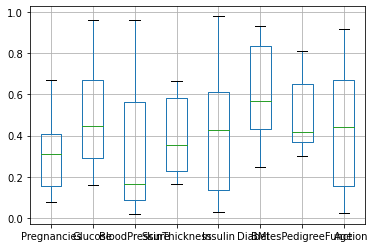

In [ ]:
box = pd.DataFrame(np.random.rand(10,8),columns=['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction','Age'])
box.plot.box(grid='True')

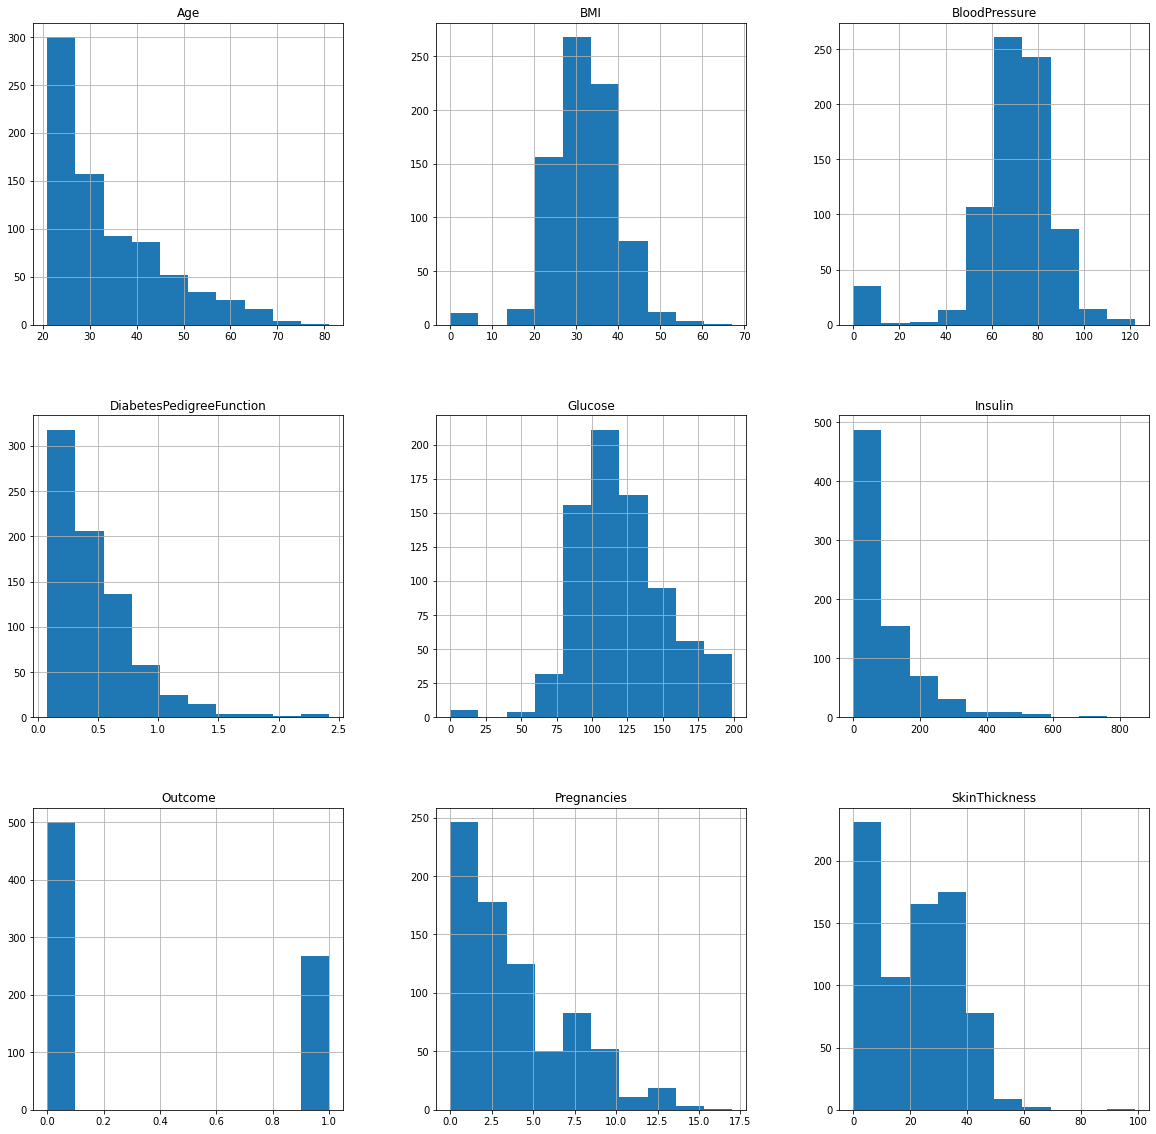

In [ ]:
p = data.hist(figsize = (20,20))

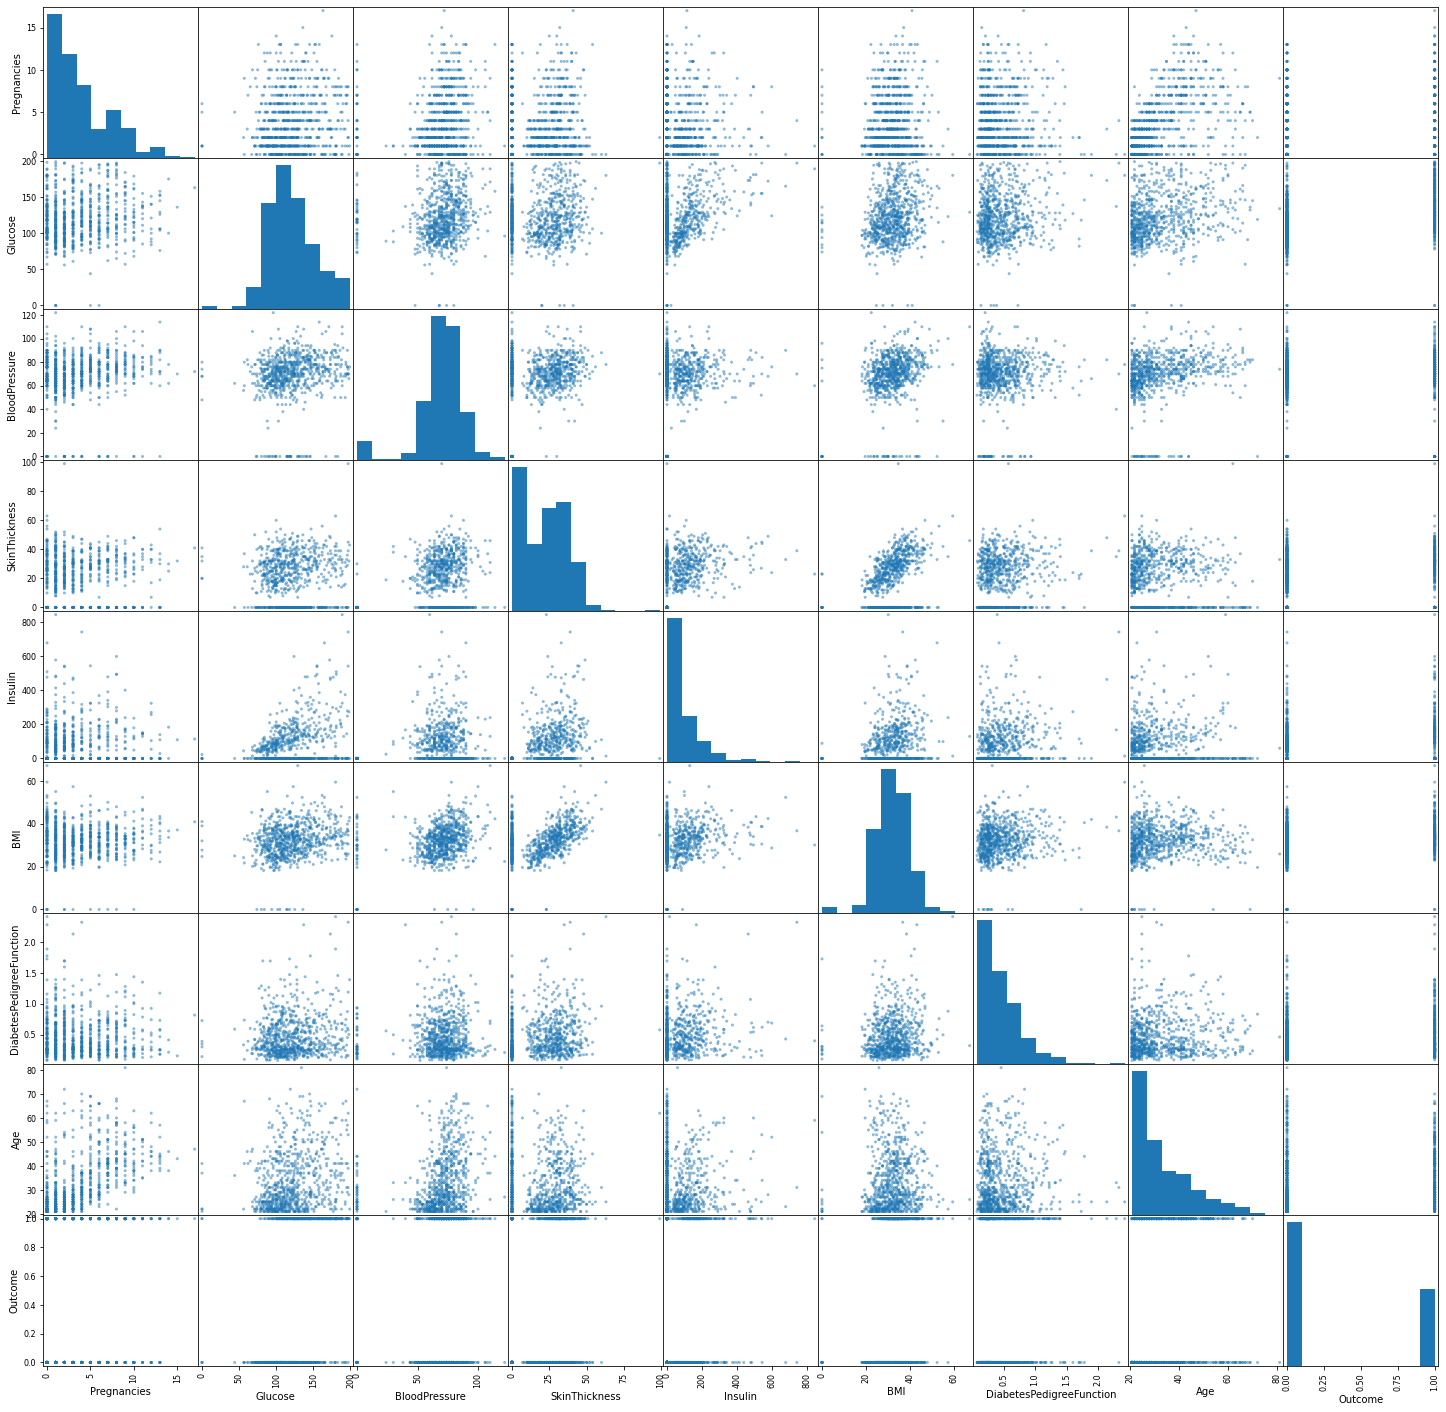

In [ ]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(data,figsize=(25, 25))

Text(0.5, 15.0, 'Predicted label')

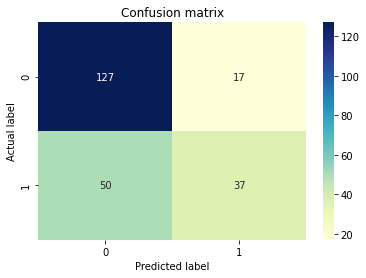

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = classifier.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

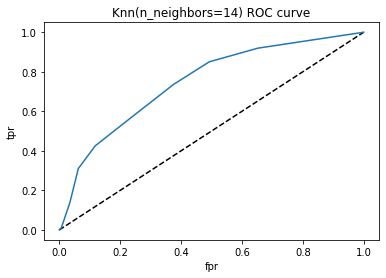

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=14) ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7462484035759898

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


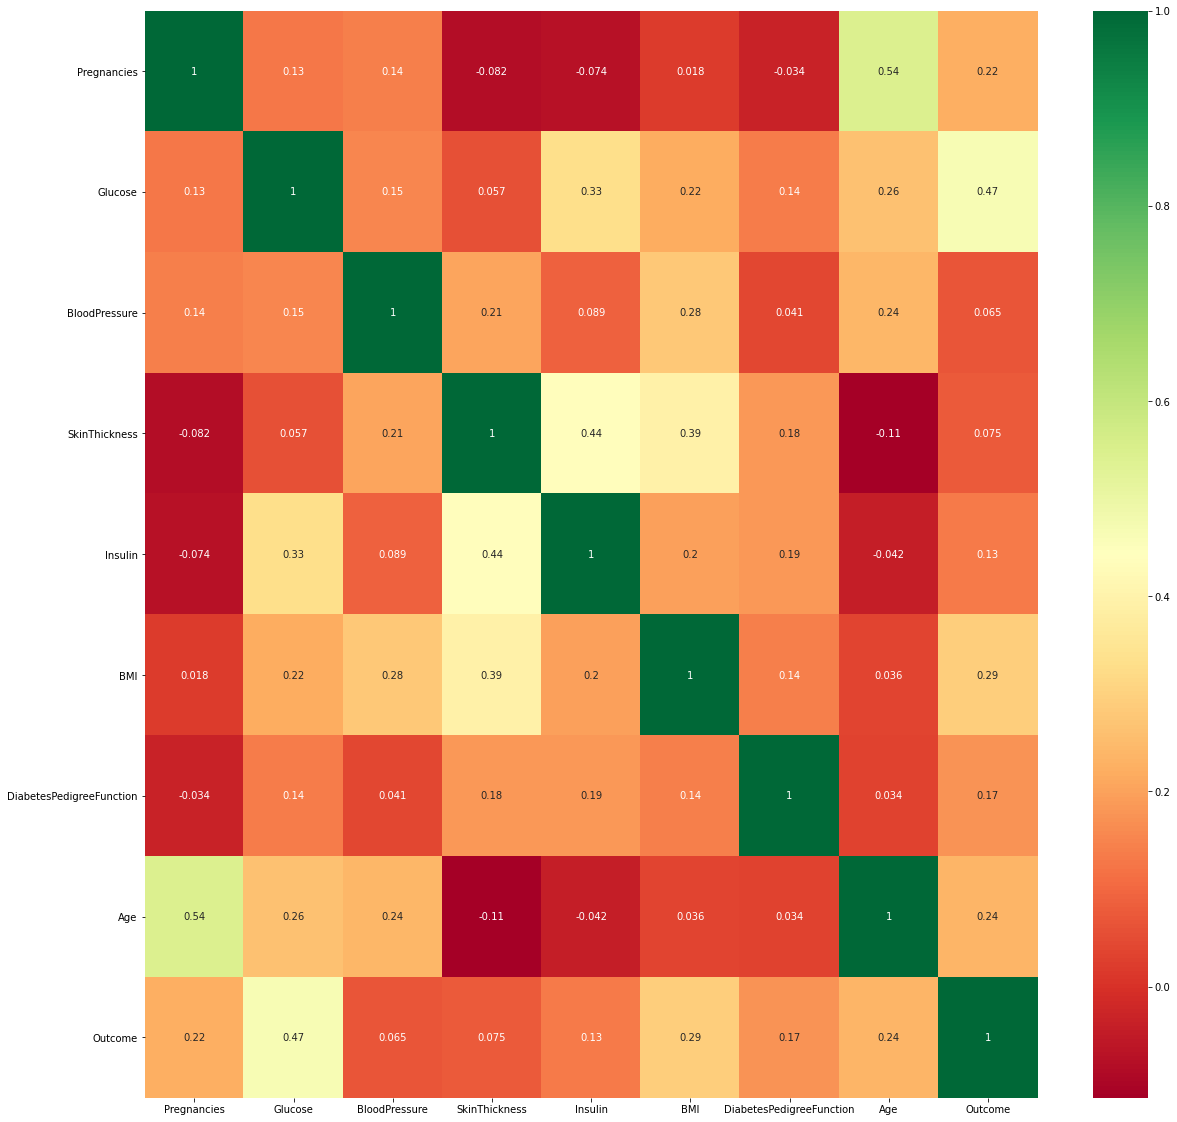

In [ ]:
##Correlations
import seaborn as sns
import matplotlib.pyplot as plt

#Get correlations of each feature in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heatmap
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Correlation is a measure of the linear relationship between two variables.
Here we visualize correlation among the 9 attributes via a 9x9 heatmap.
Note that an attribute is always perfectly correlated with itself
The scale we use is 1(Green)-0(Orange), with values lower than 0 being red as depicted to the right of the heatmap

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000



The non visual form of checking out the correlations among the various attributes

In [ ]:
diabetes_true_count = len(data.loc[data['Outcome'] == True])
diabetes_false_count = len(data.loc[data['Outcome'] == False])
(diabetes_true_count,diabetes_false_count)

(268, 500)

This tells us that the dataset has 268 entries which showed a positive outcome to the diabetes test and 500 entries which were tested negative

##The Test-Train Split

In [ ]:
## Train Test Split

from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction','Age']
predicted_class = ['Outcome']

"Outcome" will be our predicted attribute, the output. Every other attribute will be used as feature colum for feature extraction.

In [ ]:
X = data[feature_columns].values
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [ ]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing Pregnancies: {0}".format(len(data.loc[data['Pregnancies'] == 0])))
print("number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))

total number of rows : 768
number of rows missing Pregnancies: 111
number of rows missing Glucose: 5
number of rows missing BloodPressure: 35
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0


In [ ]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

SimpleImputer: Imputation transformer for completing missing values
The strategy we have used to impute all the missing values is "mean strategy"



##Implementation of Random Forest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test,predict_train_data)))

Accuracy = 0.766


Here we get the accuracy as ~76%
We try to use Extreme Gradiant Boost to see if we can better the accuracy.

##Implementation Extreme Gradient Boost Algorithm

In [ ]:
#Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [ ]:


classifier=xgboost.XGBClassifier()



In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



 Time taken: 0 hours 0 minutes and 2.54 seconds.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.4s finished


In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)

In [ ]:
score

array([0.72727273, 0.81818182, 0.76623377, 0.68831169, 0.71428571,
       0.75324675, 0.80519481, 0.84415584, 0.73684211, 0.81578947])

In [ ]:
score.mean()

0.7669514695830485

##Implementation of K-Nearest Neighbor Algorithm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
# taking best k as 15-1 = 14.
# Now creating our classifier model

classifier = KNeighborsClassifier(n_neighbors=8, p=2, metric = 'euclidean')

#Now training our model with x_train and y_train
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
#Now we use this model to predict our data
y_pred = classifier.predict(X_test)

In [ ]:
#Now testing accuray

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[127  17]
 [ 50  37]]
0.524822695035461
0.70995670995671


##Implementation of SVM Algorithm

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[130  14]
 [ 44  43]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       144
           1       0.75      0.49      0.60        87

    accuracy                           0.75       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.75      0.75      0.73       231



# Artificial neural network
### model = Sequential()
### layers = Dense()
### optimizer = Adam()
### loss fn = binary_crossentropy
### epochs = 500
### accuracy ~ 0.85(85%)
### layers = 4

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128 , input_dim = 8, activation = "relu"))
model.add(Dense(64 , activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1 , activation = "sigmoid"))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 17        
Total params: 10,465
Trainable params: 10,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(), loss = "binary_crossentropy" , metrics = ["accuracy"])

In [ ]:
model.fit(X_train,y_train,epochs = 500)

Epoch 1/500
537/537 [==============================] - 0s 263us/step - loss: 1.8698 - accuracy: 0.5959
Epoch 2/500
537/537 [==============================] - 0s 56us/step - loss: 0.6566 - accuracy: 0.6667
Epoch 3/500
537/537 [==============================] - 0s 55us/step - loss: 0.6231 - accuracy: 0.7002
Epoch 4/500
537/537 [==============================] - 0s 59us/step - loss: 0.5810 - accuracy: 0.7039
Epoch 5/500
537/537 [==============================] - 0s 55us/step - loss: 0.5878 - accuracy: 0.7039
Epoch 6/500
537/537 [==============================] - 0s 54us/step - loss: 0.5804 - accuracy: 0.7132
Epoch 7/500
537/537 [==============================] - 0s 53us/step - loss: 0.5927 - accuracy: 0.7002
Epoch 8/500
537/537 [==============================] - 0s 48us/step - loss: 0.6039 - accuracy: 0.6350
Epoch 9/500
537/537 [==============================] - 0s 46us/step - loss: 0.5826 - accuracy: 0.6816
Epoch 10/500
537/537 [==============================] - 0s 44us/step - loss: 0.58

In [ ]:
y_test = model.predict_classes(X_test)
print(confusion_matrix(y_test , y_pred))

[[111  11]
 [ 63  46]]
